In [1]:
import pandas as pd
import numpy as np
import plotly.io as pio
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import ipywidgets as widgets
import matplotlib.pyplot as plt

pio.templates.default = "seaborn"
pd.options.plotting.backend = "plotly"

%matplotlib inline

In [2]:
%store -r day_df
%store -r day_users_df

In [3]:
%run global.ipynb

In [4]:
users_df = day_users_df
df = day_df

In [5]:
total_users = users_df[users_df['gender'].notnull()]['id'].count()
total_users

1534

In [12]:
users_df

,id,gender,ageRange,occupation,compareDate,stepsEstimate
0,5ee39a5f5e886e000876182a,None,None,None,2020-03-16,NaN
1,5ee39a6c25435e00071454e5,None,None,None,2020-03-16,NaN
2,5ee7889a48553d0007a3611b,None,None,None,2020-03-16,NaN
3,5ee363476c1e91000780579a,None,None,None,2020-03-16,NaN
4,5ee86f904553a80008cc0d89,None,None,None,2020-03-16,NaN
...,...,...,...,...,...,...
1642,61e842c795259e0009bc6b34,Female,None,None,2020-03-16,0.3
1643,61ec70a206e45600092d7d07,Female,45-54,None,2020-03-16,0.0
1644,61efb71c51565f0009029cd9,Female,18-24,fysioterapeut,2020-03-16,-0.2
1645,61efb79a0e3de70009254596,Female,None,None,2020-03-16,0.8


In [13]:
def getChange(users):
    users = users.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['period']).sum().unstack('period')[0]
    #users['diff'] = users.before - users.after;
    users['change'] = -((users['Before'] - users['During']) / users['Before']) * 100
    return users

def getChangeGenders(male, female):
    users = users.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['period']).sum().unstack('period')[0]
    #users['diff'] = users.before - users.after;
    users['change'] = -((users.before - users.after) / users.before) * 100
    return users

def getCount(users):
    users = users
    return users.groupby

def make_pretty(styler):
    styler.set_caption("Users")
    # styler.background_gradient(axis=None, vmin=1, vmax=2, cmap="YlGnBu")
    return styler

In [14]:
df.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index()

,hour,period,0
0,00,Before,14.621472
1,00,During,7.916593
2,01,Before,3.331820
3,01,During,1.404895
4,02,Before,0.403431
5,02,During,0.102151
6,03,Before,0.021505
7,03,During,0.000000
8,04,Before,0.002875
9,04,During,0.000000


In [15]:
df.groupby(['hour','series', 'period']).median().unstack('series')['steps'].mean(axis=1).reset_index().groupby(['period', 'hour']).sum().unstack('period')[0]

period,Before,During
hour,,
00,14.621472,7.916593
01,3.331820,1.404895
02,0.403431,0.102151
03,0.021505,0.000000
04,0.002875,0.000000
05,1.616769,0.121364
06,32.769603,10.975494
07,211.567458,105.713176
08,311.565669,177.784161


In [16]:
df_agg = df.agg({
    'test': ['mean']
})

KeyError: "Column(s) ['test'] do not exist"

In [18]:
data = df[df['period'] != 'none']
table = pd.DataFrame()
table['All'] = getChange(data)
table['Male'] = getChange(data[data['gender'] == 'Male'])
table['Female'] = getChange(data[data['gender'] == 'Female'])

age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']
for age_range in age_ranges:
    age_df = data[data['ageRange'] == age_range]
    table[age_range] = getChange(age_df)
    
    table['Male ' + age_range] = getChange(age_df[age_df['gender'] == 'Male'])
    table['Female ' + age_range] = getChange(age_df[age_df['gender'] == 'Female'])

table = table.transpose()
table['During'] = table['During'].map('{:.0f}'.format)
table['Before'] = table['Before'].map('{:.0f}'.format)
#table['diff'] = table['diff'].map('{:.0f}'.format)
table['change'] = table['change'].map('{0:.2f}%'.format)

In [19]:
table

period,Before,During,change
All,5662,5073,-10.40%
Male,6172,5637,-8.66%
Female,5442,4793,-11.93%
18-24,5615,4657,-17.06%
Male 18-24,5979,4815,-19.46%
Female 18-24,5422,4545,-16.17%
25-34,6155,5190,-15.68%
Male 25-34,6640,5581,-15.95%
Female 25-34,5651,4734,-16.23%
35-44,6297,5882,-6.59%


In [20]:
users_table = users_df.groupby(['ageRange']).count()

In [46]:
users_table = users_df.groupby(['ageRange', 'gender']).count()
users_table['count'] = users_table['id']
users_table['percent'] = 100 * users_table['count'] / users_table['count'].sum()
users_table['percent'] = users_table['percent'].map('{0:.2f}%'.format)
#users_table['Female'] = users_table[users_table['gender'] == 'Female']
#del users_table['ageRange']
del users_table['occupation']
del users_table['compareDate']
del users_table['stepsEstimate']
del users_table['id']

# users_table['Male'] = 20000

#users_table = users_table.transpose()
#users_table = users_table.transpose()
users_table.style.format(thousands=" ").pipe(make_pretty)

In [22]:
users_table = users_df.groupby(['gender']).count()
users_table['count'] = users_table['id']
users_table['percent'] = 100 * users_table['count'] / users_table['count'].sum()
users_table['percent'] = users_table['percent'].map('{0:.2f}%'.format)
del users_table['ageRange']
del users_table['occupation']
del users_table['compareDate']
del users_table['stepsEstimate']
del users_table['id']

# users_table['Male'] = 20000

#users_table = users_table.transpose()
#users_table = users_table.transpose()
users_table.style.format(thousands=" ").pipe(make_pretty)

,count,percent
gender,,
Female,852,55.54%
Male,677,44.13%
Other,2,0.13%
Prefer not to say,3,0.20%


In [23]:
users_table['count'].sum()

1534

In [214]:
data = df[df['period'] != 'none']
data=data[data['gender']=='Female']
table = pd.DataFrame()
#lookup = pd.DataFrame()
#lookup['All'] = getChange(data)
#lookup['Male'] = getChange(data[data['gender'] == 'Male'])
#lookup['Female'] = getChange(data[data['gender'] == 'Female'])

age_ranges = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84']
for age_range in age_ranges:
    age_df = data[data['ageRange'] == age_range]
    table[age_range] = getChange(age_df)
    
#    table['Male ' + age_range] = getChange(age_df[age_df['gender'] == 'Male'])
#    table['Female ' + age_range] = getChange(age_df[age_df['gender'] == 'Female'])

table = table.transpose()
table['During'] = table['During'].map('{:.0f}'.format)
table['Before'] = table['Before'].map('{:.0f}'.format)
#table['diff'] = table['diff'].map('{:.0f}'.format)
table['change'] = table['change'].map('{0:.2f}%'.format)

In [215]:
table

period,Before,During,change
18-24,5422,4545,-16.17%
25-34,5651,4734,-16.23%
35-44,5692,5225,-8.20%
45-54,5788,5226,-9.71%
55-64,5238,4665,-10.95%
65-74,5095,4852,-4.77%
75-84,3488,3389,-2.86%


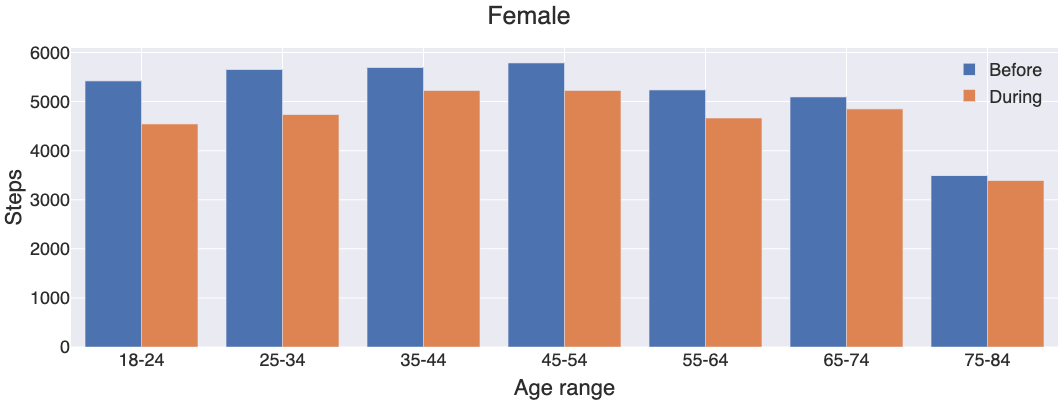

In [217]:

axis = table.index.to_numpy()
data = table[['Before','During']].astype(int).to_numpy()

#fig = plt.figure(figsize=(8,16))
#ax = fig.add_subplot()

#ax.bar(axis, data[:,0], label='Before')
#ax.bar(axis, data[:,1], label='During')

#plt.title('Male')
#plt.ylabel('Steps')
#plt.xlabel('Age group')

#plt.legend()

#style_plot(fig)

#fig, ax = plt.subplots(nrows=1, ncols=2)

fig1 = table[['Before', 'During']].astype(int).plot(kind='bar', barmode='group')
#fig = table[['During']].astype(int).plot(kind='bar')
style_plot(fig1)
fig1.update_layout(yaxis=dict(title='Steps'), title='Female')
fig1.update_layout(xaxis=dict(title='Age range'))
fig1.update_layout(
    margin=dict(l=0, r=0, t=48, b=32),
)
fig1.update_layout(height=400)
fig1.update_layout(width=500)
fig1.show()

#fig.add_trace(fig1, row=1, col=1)
#fig.show()


In [80]:
# table 2

x = users_df.groupby(['ageRange','gender'])['id'].nunique().unstack()
x = x.fillna(0).astype(int)
x['Female %'] = (x['Female'] * 100 / (x['Female'] + x['Male'])).round(2)
x['Male %'] = (x['Male'] * 100 / (x['Female'] + x['Male'])).round(2)
del x['Other']
del x['Prefer not to say']
x.index.rename('Age Group', inplace=True)
x.columns.name = None
x

,Female,Male,Female %,Male %
Age Group,,,,
18-24,77,64,54.61,45.39
25-34,86,150,36.44,63.56
35-44,160,133,54.61,45.39
45-54,230,139,62.33,37.67
55-64,162,102,61.36,38.64
65-74,60,49,55.05,44.95
75-84,17,8,68.00,32.00
85-94,0,2,0.00,100.00
